#Imports

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import keras.datasets as mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

#Data

In [4]:
from keras.datasets import mnist
from mnist_data import MnistData

# Create an instance of the MnistData class
mnist_data = MnistData()
(x_train, t_train), (x_test, t_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Visualize examples

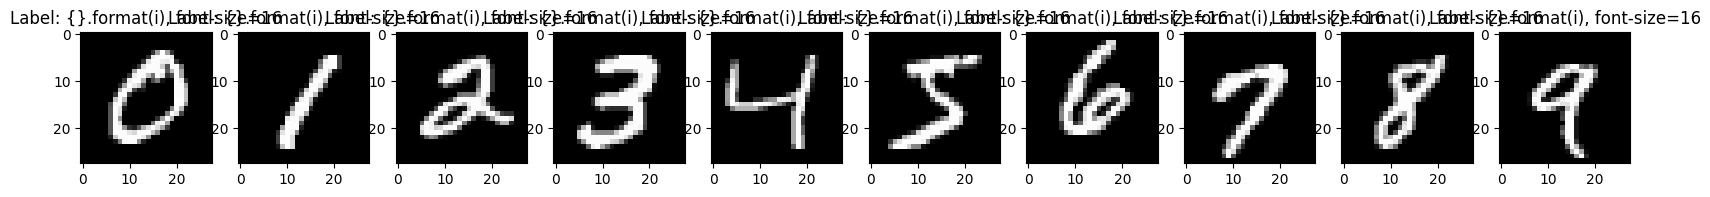

In [6]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[t_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}.format(i), font-size=16")

In [7]:
for i in range(10):
  print(t_train[i])

5
0
4
1
9
2
1
3
1
4


In [8]:
t_train = keras.utils.to_categorical(t_train, num_classes)
t_test = keras.utils.to_categorical(t_test, num_classes)

In [9]:
for i in range(10):
  print(t_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#Prepare Data

In [10]:
#Normalize Data

x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
#Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print(x_train.shape)

(60000, 784)


#Create Model-Fully Connected Neural Network

In [12]:
class MnistData():
    image_size = 784  # 28x28
    image_dim = (1, 28, 28)
    train_num = 60000
    test_num  = 10000
    key_file = {
        'train_images': 'train-images-idx3-ubyte.gz',
        'train_labels': 'train-labels-idx1-ubyte.gz',
        'test_images':  't10k-images-idx3-ubyte.gz',
        'test_labels':  't10k-labels-idx1-ubyte.gz'
    }

model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Train

In [13]:
learning_rate = 0.1
batch_size = 64
epochs=10
model.fit(x=x_train, y=t_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 0.3119 - accuracy: 0.9086
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1265 - accuracy: 0.9621
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0887 - accuracy: 0.9733
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0677 - accuracy: 0.9789
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0543 - accuracy: 0.9825
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0454 - accuracy: 0.9853
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0377 - accuracy: 0.9877
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0320 - accuracy: 0.9896
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0290 - accuracy: 0.9906
Epoch 10/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0251 - accuracy: 0.9915

In [14]:
for epoch in range(epochs):
    for i in range(0, len(x_train), batch_size):
        x_batch = x_train[i:i + batch_size]
        t_batch = t_train[i:i + batch_size]

if i % 1000 == 0:
  print(f'Epoch {epoch + 1}, Iteration {i}, Loss: {loss}')

print("Training completed.")

Training completed.


#Evaluate

In [15]:
test_loss, test_acc = model.evaluate(x_test, t_test)

print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0691 - accuracy: 0.9808
Test Loss: 0.06913645565509796, Test Accuracy: 0.9807999730110168


In [16]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[1.5556491e-09 2.9882099e-07 2.8334870e-07 ... 9.9999911e-01
  1.5781891e-09 2.8625664e-08]
 [1.8214364e-09 3.5720628e-08 9.9999970e-01 ... 1.2584888e-11
  1.0716228e-10 4.2538958e-12]
 [6.6599014e-08 9.9938601e-01 2.8213206e-05 ... 5.6238705e-04
  1.7641034e-05 8.3844292e-09]
 ...
 [3.9156581e-16 6.0524946e-10 6.2224612e-13 ... 1.9855664e-09
  8.0830322e-11 6.1786718e-06]
 [2.2575460e-13 6.7864508e-15 1.5530528e-13 ... 5.3925471e-12
  2.2658332e-07 2.7492470e-12]
 [9.5696118e-11 1.5302988e-18 2.3294638e-15 ... 4.9091085e-20
  5.6142923e-14 1.5153891e-15]]
[7 2 1 ... 4 5 6]


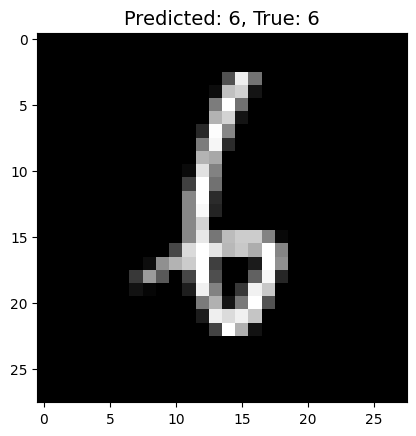

In [17]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(t_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=14)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

#Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

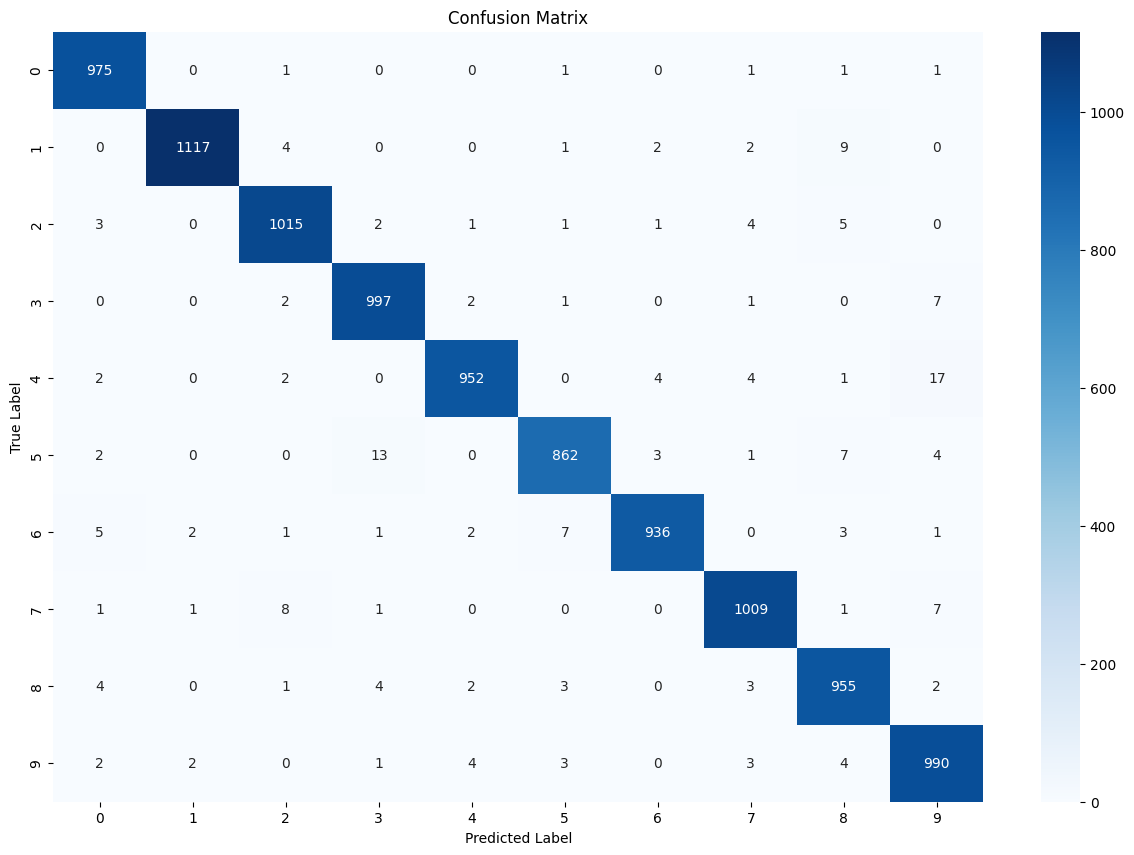

In [18]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#plot

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

#Find Errors

In [19]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [20]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

#Get a list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

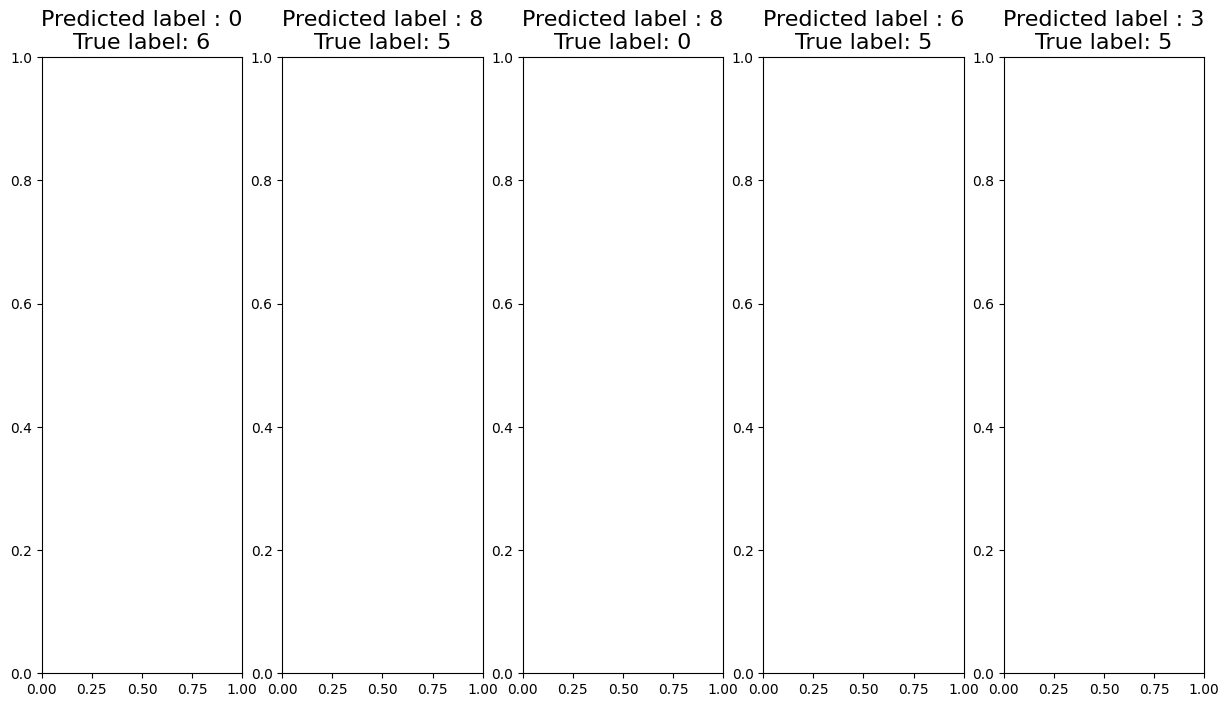

In [23]:
#Show top errors

num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(15, 8))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28, 28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].set_title("Predicted label : {}\nTrue label: {}".format(y_p, y_t), fontsize=16)